In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

plt.style.use("default")
plt.rcParams["figure.figsize"] = (10,6)

DATA_PATH = "hackathon_ultra_optimized.csv"
df = pd.read_csv(DATA_PATH, low_memory=False)

print("Veri Boyutu:", df.shape)
df.head()


/home/ugo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


Veri Boyutu: (27381, 261)


,Price,m² (Gross),m² (Net),Number of floors,Heating,Number of bathrooms,Balcony,Furnished,Using status,From who,Swap,Front West,Front East,Front South,Front North,ADSL,Wood Joinery,Smart House,Alarm (Thief),Alarm (Fire),Alaturka Toilet,Aluminum joinery,American Door,American kitchen,Built-in on,Elevator,Balcony.1,Barbecue,Household appliances,Painted,Dishwasher,Refrigerator,Wall paper,Shower,Parents' Bathroom,Fiber Internet,On,Dressing room,Closet,Video intercom,Hilton Bathroom,Intercom System,Insulating glass,Jacuzzi,Plasterboard,Cellar,Air conditioning,Tub,Laminate Floor,Marley,Furniture,Kitchen (Built-in),Kitchen (Laminate),Kitchen Natural Gas,PVC Joinery,Blinds,Parquet Floor,Ceramic Floor,Set Top Cooker,Spot Lighting,Terrace,Thermosiphon,Cloakroom,Wi-Fi,Face Recognition & Fingerprint,Washing Machine,Washing machine,Laundry room,Steel door,Water heater,Fireplace,Elevator.1,Steam room,Security,Bath,Booster,Thermal Insulation,Generator,Cable TV,Closed Garage,Doorman,Nursery,With Private Pool,Car park,Playground,Sauna,Sound insulation,Siding,Sports Area,Water tank,Tennis court,Satellite,Fire escape,Swimming Pool (Open),Swimming Pool (Indoor),Parking Lot,Elevator.2,Bathroom,Wide Corridor,Entrance / Ramp,Stairs,Kitchen,Room door,Park,Socket / Electric Switch,Handle / Railing,Toilet,Swimming pool,The mall,municipality,Mosque,Cemevi,Next to sea shore,Pharmacy,Amusement center,Fair,Hospital,Synagogue,The church,High school,Market,Park.1,Police station,The health clinic,District Market,Gym,Unirsity,Primary School-Secondary School,Fire Department,Town center,Highway,Eurasia Tunnel,Bosphorus Bridges,Street,Sea bus,Filled,E-5,Airport,Marmaray,Metro,Metrobus,Minibus,Bus stop,Coast,TEM,Cable car,Tram,Railway station,Trolley bus,Scaffolding,Throat,Sea,Nature,Lake,Pool,Park & ​​Green Area,City,Mezzanine,Mezzanine Duplex,Garden Duplex,Garden Floor,Garden,Top floor,Garage / Shop Top,Entrance floor,Floor Duplex,Private Entry,Rerse Duplex,Triplex,Ground floor,Roof Duplex,Total_Rooms,Building_Age_Numeric,Floor_Numeric,Luxury_Score,Security_Index,Transport_Score,View_Score,Efficiency_Ratio,Log_Price,Dist_Arnavutköy,Dist_Ataşehir,Dist_Avcılar,Dist_Bahçelievler,Dist_Bakırköy,Dist_Bayrampaşa,Dist_Bağcılar,Dist_Başakşehir,Dist_Beykoz,Dist_Beylikdüzü,Dist_Beyoğlu,Dist_Beşiktaş,Dist_Büyükçekmece,Dist_Esenler,Dist_Esenyurt,Dist_Eyüpsultan,Dist_Fatih,Dist_Gaziosmanpaşa,Dist_Güngören,Dist_Kadıköy,Dist_Kartal,Dist_Kağıthane,Dist_Küçükçekmece,Dist_Maltepe,Dist_Pendik,Dist_Sancaktepe,Dist_Sarıyer,Dist_Silivri,Dist_Sultanbeyli,Dist_Sultangazi,Dist_Tuzla,Dist_Zeytinburnu,Dist_Çatalca,Dist_Çekmeköy,Dist_Ümraniye,Dist_Üsküdar,Dist_Şile,Dist_Şişli,Neighborhood_TargetEncoded,Available_for_Loan_Bin,m² (Gross)_squared,m² (Gross)_sqrt,m² (Gross)_log,m² (Net)_squared,m² (Net)_sqrt,m² (Net)_log,Total_Rooms_squared,Total_Rooms_sqrt,Total_Rooms_log,Building_Age_Numeric_squared,Building_Age_Numeric_sqrt,Building_Age_Numeric_log,Floor_Numeric_squared,Floor_Numeric_sqrt,Floor_Numeric_log,Price_per_sqm_gross,Price_per_sqm_net,Sqm_per_room,Age_Floor_interaction,Luxury_Sqm,Security_Transport,Total_Feature_Score,Floor_Ratio,Total_Yes_Count,Feature_Density,Cluster_5,Cluster_5_min_dist,Cluster_10,Cluster_10_min_dist,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,Neighborhood_TE_Normalized,Neighborhood_TE_Log
0,620000,150,140.0,3.0,Natural Gas (Combi),1,Available,No,Property owner,From the real estate office,No,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,1,1,1,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,4.0,28.0,3.0,0,1,4,0,0.933333,13.337476,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [9]:
# Genel bilgi
df.info()

# Sayısal özet
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27381 entries, 0 to 27380
Columns: 261 entries, Price to Neighborhood_TE_Log
dtypes: bool(38), float64(43), int64(173), object(7)
memory usage: 47.6+ MB


,count,mean,std,min,25%,50%,75%,max
Price,27381.0,6.054068e+05,654053.832271,20000.000000,275000.000000,398000.000000,640000.000000,5.100000e+06
m² (Gross),27381.0,1.243239e+02,77.836297,20.000000,90.000000,110.000000,144.000000,9.140000e+03
m² (Net),27381.0,1.082837e+02,43.932134,10.000000,80.000000,98.000000,125.000000,5.500000e+02
Number of floors,27381.0,6.283773e+00,4.185365,1.000000,4.000000,5.000000,6.000000,2.900000e+01
Front West,27381.0,2.647456e-01,0.441206,0.000000,0.000000,0.000000,1.000000,1.000000e+00
...,...,...,...,...,...,...,...,...
PCA_8,27381.0,-1.608913e-16,2.136932,-8.168397,-1.446844,-0.024461,1.276968,1.343362e+01
PCA_9,27381.0,1.959241e-16,2.032194,-33.628889,-1.078370,-0.011046,1.206761,9.903017e+00
PCA_10,27381.0,-1.582963e-17,1.936510,-35.321286,-0.876377,-0.145065,0.958681,1.602719e+01
Neighborhood_TE_Normalized,27381.0,-4.839714e-17,1.000000,-1.108931,-0.545826,-0.349985,0.106316,7.303688e+00


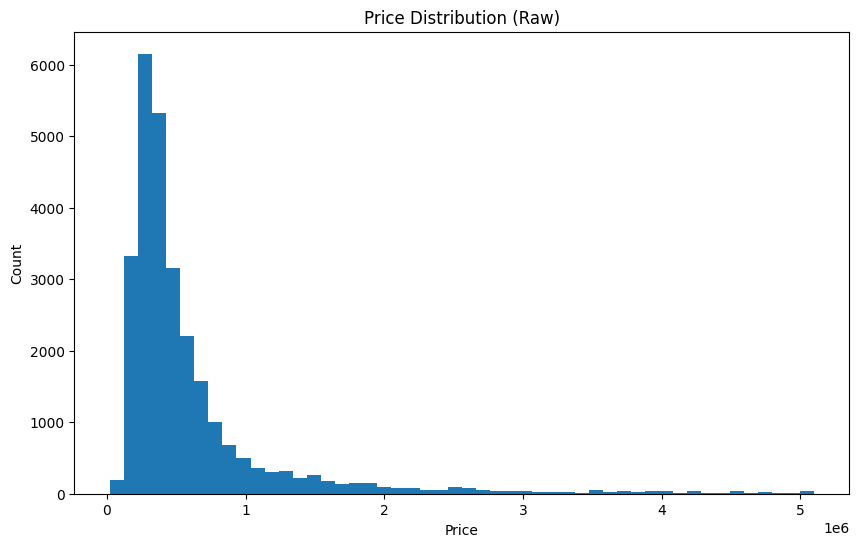

Price Skewness: 3.5429311842043645


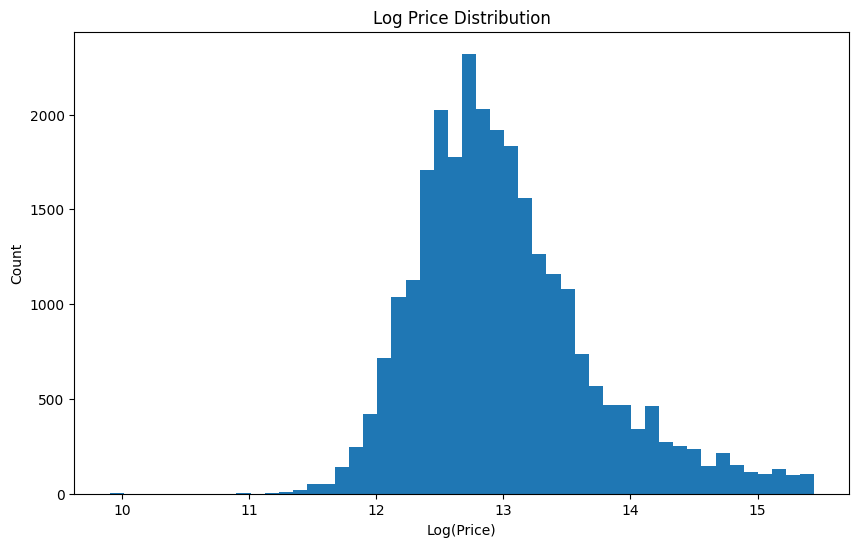

Log Price Skewness: 0.8848617255462833


In [10]:
# Price dağılımı
plt.hist(df["Price"], bins=50)
plt.title("Price Distribution (Raw)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

print("Price Skewness:", skew(df["Price"]))

# Log dönüşüm
plt.hist(df["Log_Price"], bins=50)
plt.title("Log Price Distribution")
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()

print("Log Price Skewness:", skew(df["Log_Price"]))


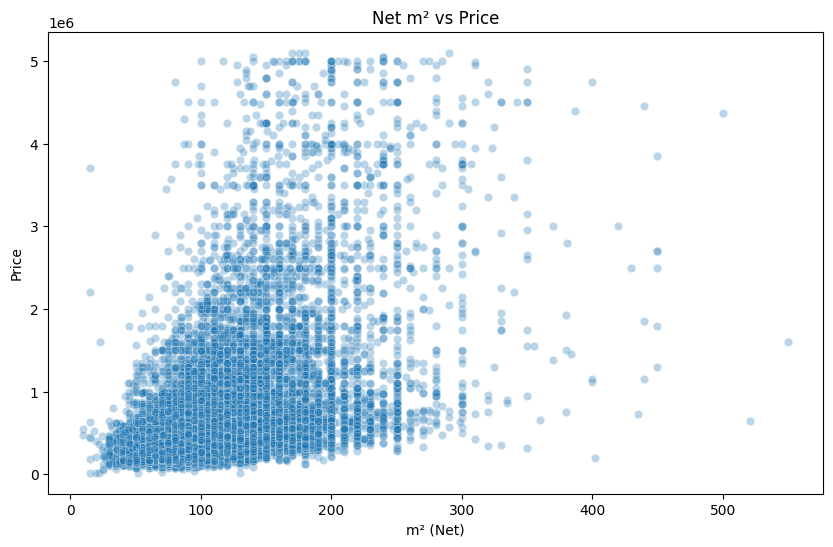

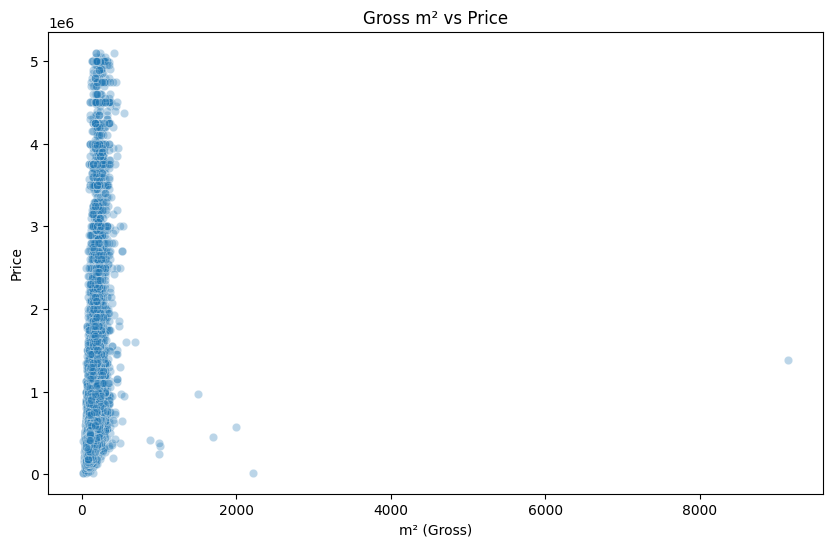

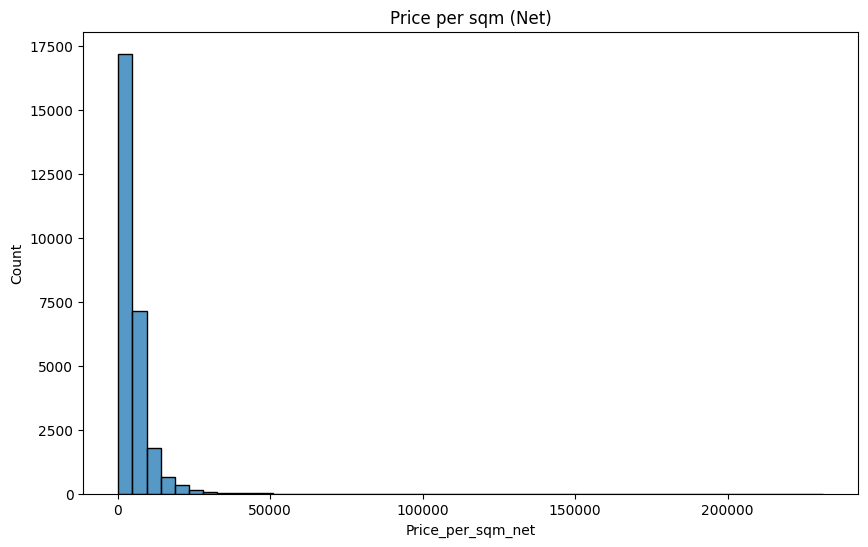

In [11]:
# m² vs Price
sns.scatterplot(x="m² (Net)", y="Price", data=df, alpha=0.3)
plt.title("Net m² vs Price")
plt.show()

sns.scatterplot(x="m² (Gross)", y="Price", data=df, alpha=0.3)
plt.title("Gross m² vs Price")
plt.show()

# Price per sqm
sns.histplot(df["Price_per_sqm_net"], bins=50)
plt.title("Price per sqm (Net)")
plt.show()


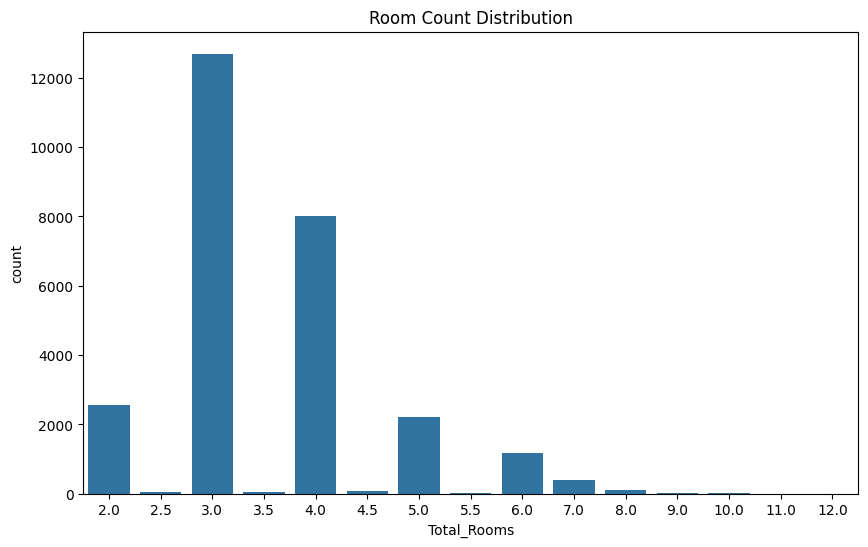

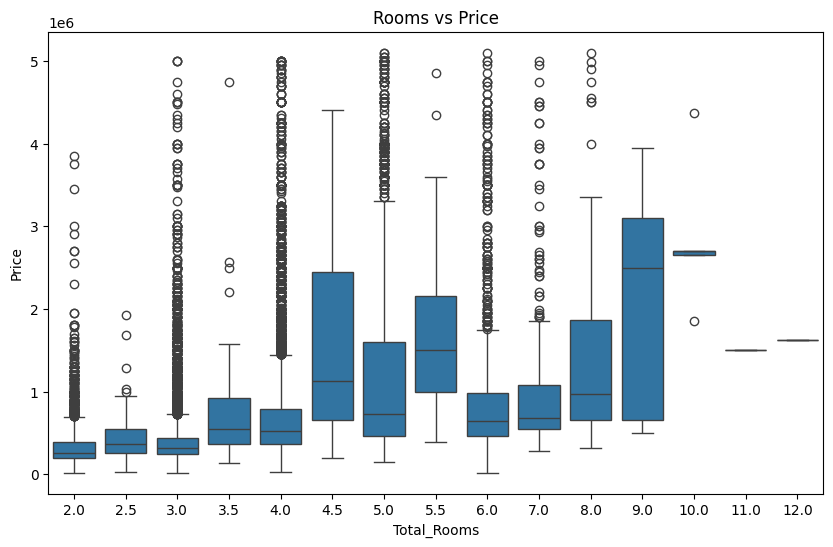

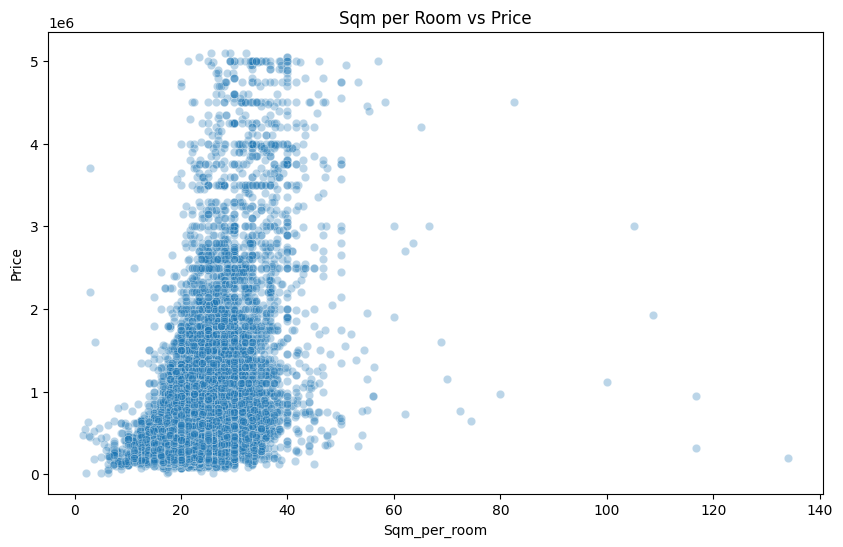

In [12]:
# Total rooms distribution
sns.countplot(x="Total_Rooms", data=df)
plt.title("Room Count Distribution")
plt.show()

# Rooms vs price
sns.boxplot(x="Total_Rooms", y="Price", data=df)
plt.title("Rooms vs Price")
plt.show()

# Efficiency
sns.scatterplot(x="Sqm_per_room", y="Price", data=df, alpha=0.3)
plt.title("Sqm per Room vs Price")
plt.show()


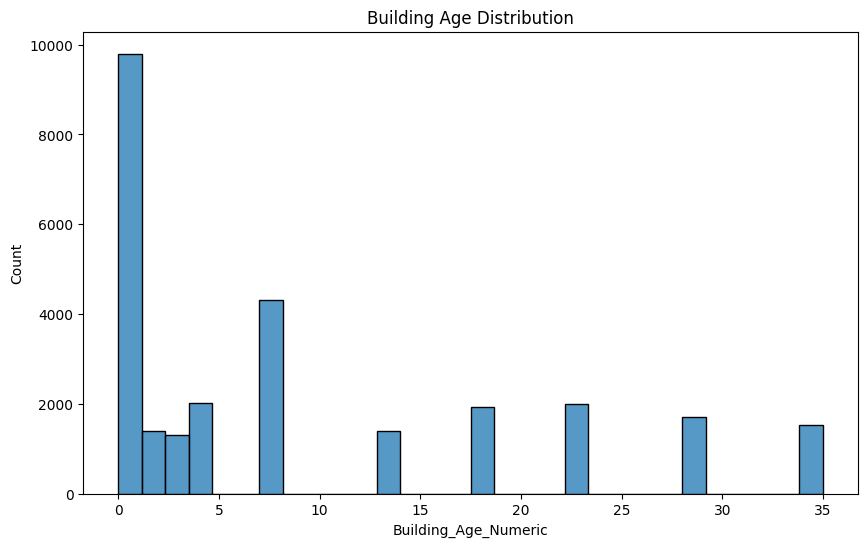

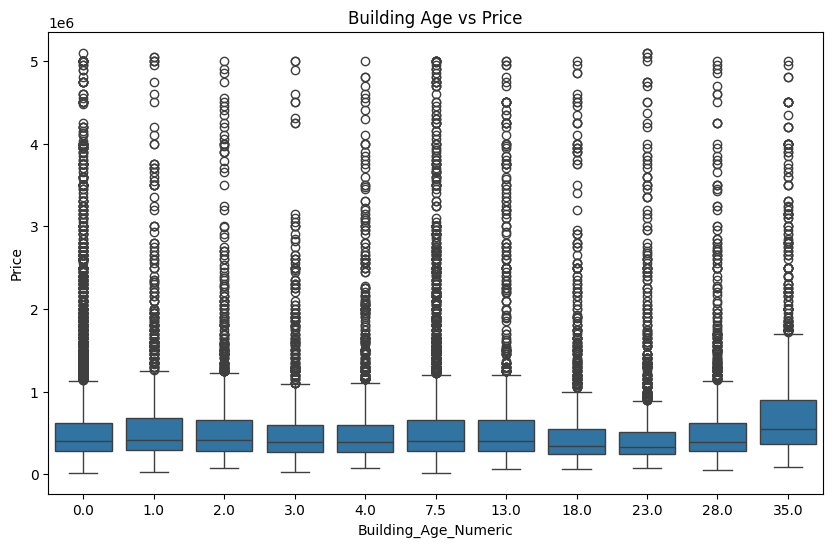

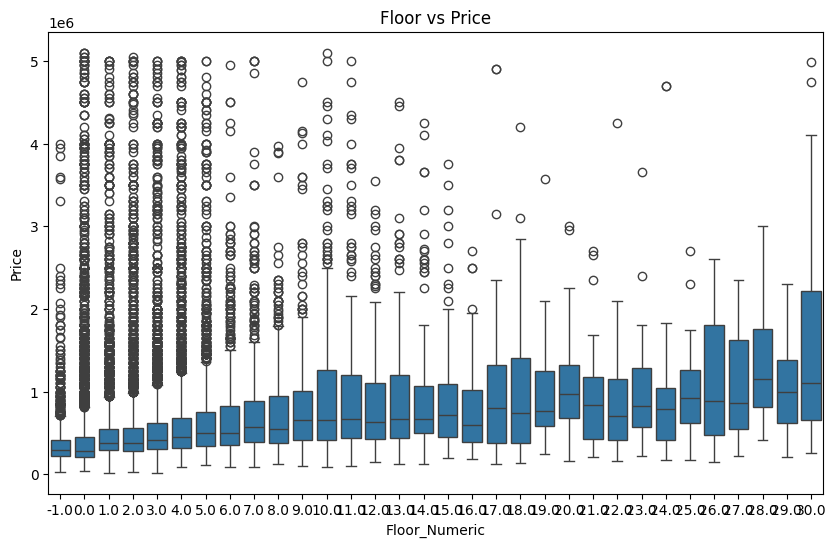

In [13]:
# Building age
sns.histplot(df["Building_Age_Numeric"], bins=30)
plt.title("Building Age Distribution")
plt.show()

sns.boxplot(x="Building_Age_Numeric", y="Price", data=df)
plt.title("Building Age vs Price")
plt.show()

# Floor effect
sns.boxplot(x="Floor_Numeric", y="Price", data=df)
plt.title("Floor vs Price")
plt.show()


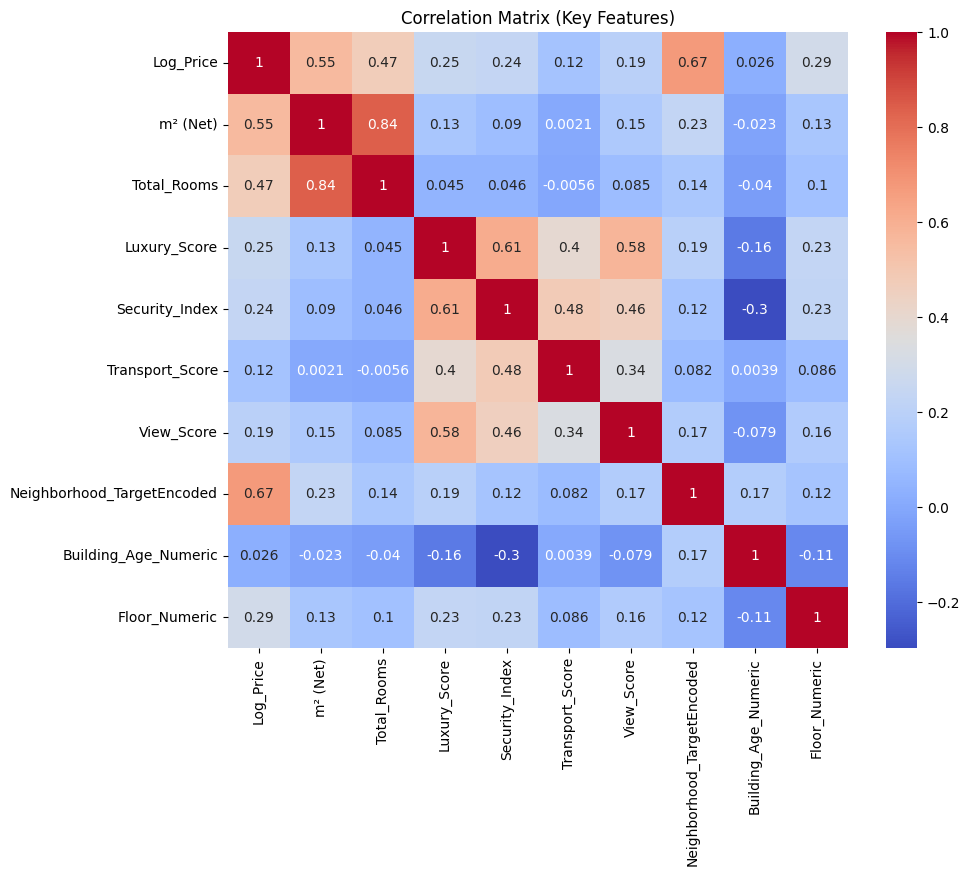

In [18]:
# Önemli sayısal feature'lar
important_features = [
    "Log_Price",
    "m² (Net)",
    "Total_Rooms",
    "Luxury_Score",
    "Security_Index",
    "Transport_Score",
    "View_Score",
    "Neighborhood_TargetEncoded",
    "Building_Age_Numeric",
    "Floor_Numeric"
]

corr = df[important_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Key Features)")
plt.show()


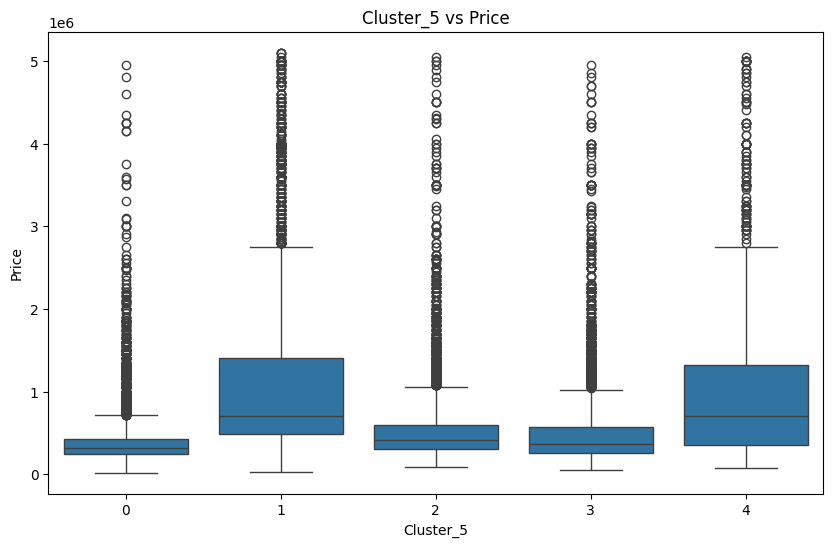

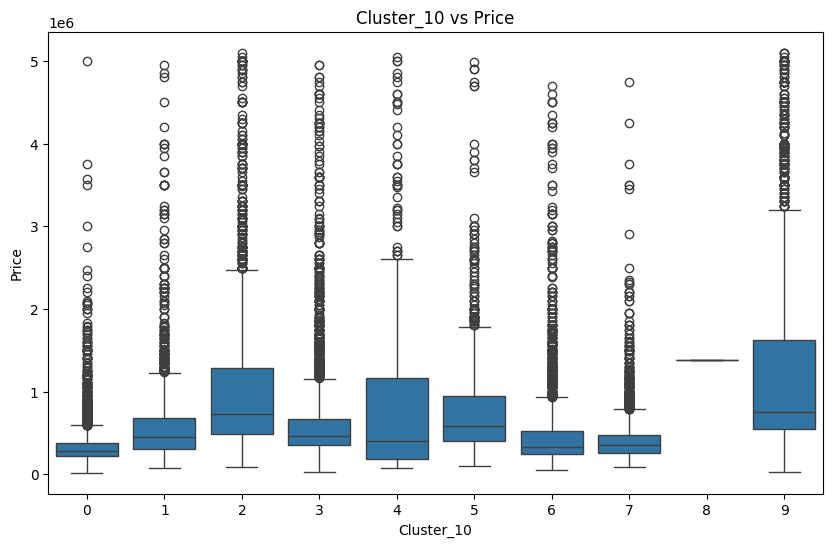

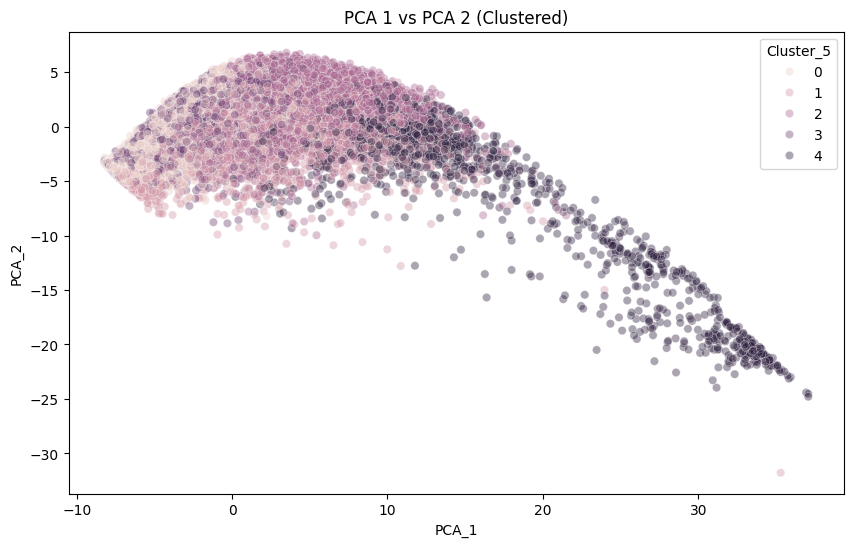

In [19]:
# Cluster price distribution
sns.boxplot(x="Cluster_5", y="Price", data=df)
plt.title("Cluster_5 vs Price")
plt.show()

sns.boxplot(x="Cluster_10", y="Price", data=df)
plt.title("Cluster_10 vs Price")
plt.show()

# PCA visualization
sns.scatterplot(x="PCA_1", y="PCA_2", hue="Cluster_5", data=df, alpha=0.4)
plt.title("PCA 1 vs PCA 2 (Clustered)")
plt.show()


In [20]:
leakage_cols = [
    "Price_per_sqm_gross",
    "Price_per_sqm_net"
]

for col in leakage_cols:
    corr_val = df[col].corr(df["Price"])
    print(f"{col} correlation with Price: {corr_val:.4f}")


Price_per_sqm_gross correlation with Price: 0.8634
Price_per_sqm_net correlation with Price: 0.8012


In [ ]:

numeric_df = df.select_dtypes(include=[np.number])

price_corr = (
    numeric_df
    .corr()["Price"]
    .sort_values(ascending=False)
)

eda_summary = {
    "Rows": df.shape[0],
    "Columns": df.shape[1],
    "Price_Mean": df["Price"].mean(),
    "Price_Median": df["Price"].median(),
    "Top_Feature_Corr": price_corr[1:10]  
}

eda_summary


{'Rows': 27381,
 'Columns': 261,
 'Price_Mean': np.float64(605406.7505569556),
 'Price_Median': np.float64(398000.0),
 'Top_Feature_Corr': Log_Price                     0.876020
 Price_per_sqm_gross           0.863409
 Price_per_sqm_net             0.801250
 Neighborhood_TE_Normalized    0.710611
 Neighborhood_TargetEncoded    0.710611
 Neighborhood_TE_Log           0.667835
 PCA_3                         0.587574
 m² (Gross)_sqrt               0.522035
 m² (Gross)_log                0.520039
 Name: Price, dtype: float64}